In [ ]:
# Pandas helps us work with datasets in table format
import pandas as pd

# STEP 1: Load the dataset

df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

# STEP 2: Remove unnecessary columns

# These columns do not add useful information for analysis or modeling
columns_to_remove = [
    'EmployeeCount', 
    'Over18', 
    'StandardHours', 
    'EmployeeNumber'
]

# Drop those columns from the dataset
df = df.drop(columns=columns_to_remove)

# STEP 3: Convert Attrition column to numeric

# Machine learning models cannot understand "Yes" and "No"
# So we convert:
# Yes -> 1
# No  -> 0

df['Attrition'] = df['Attrition'].map({
    'Yes': 1,
    'No': 0
})

# STEP 4: Check dataset information
# Display basic information about dataset
# (number of rows, columns, data types, missing values)
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

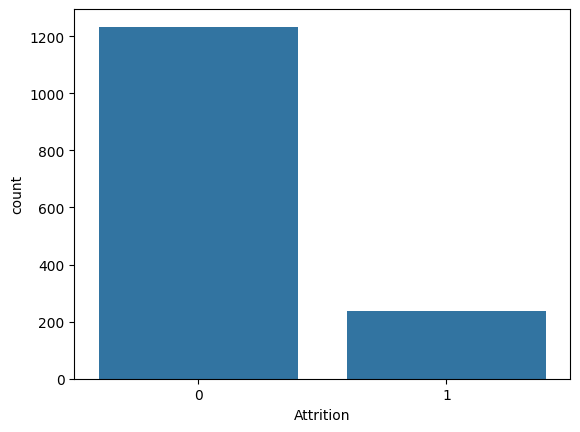

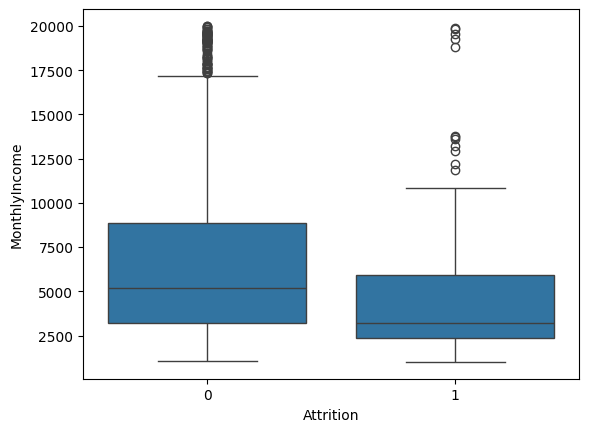

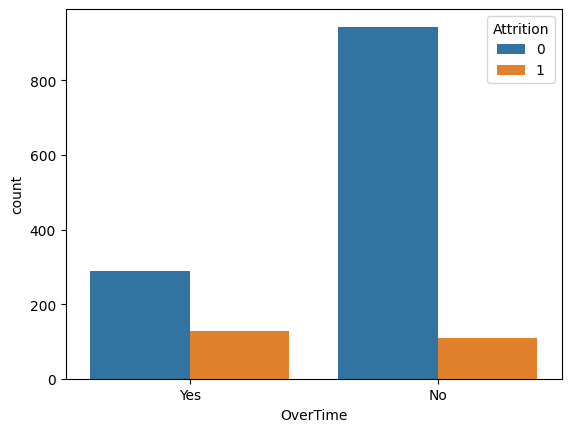

In [ ]:
# Import libraries for visualization

import seaborn as sns          # For statistical plots
import matplotlib.pyplot as plt # For displaying charts

# 1️. Count Plot: Attrition Distribution
# This shows how many employees left (1) vs stayed (0)

sns.countplot(x='Attrition', data=df)

plt.title("Number of Employees Who Left vs Stayed")
plt.xlabel("Attrition (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# 2️. Box Plot: Monthly Income vs Attrition
# This shows income distribution for:
# Employees who left vs employees who stayed

sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)

plt.title("Monthly Income by Attrition")
plt.xlabel("Attrition (0 = No, 1 = Yes)")
plt.ylabel("Monthly Income")
plt.show()

# 3️. Count Plot: Overtime vs Attrition
# This shows if overtime workers leave more often

sns.countplot(x='OverTime', hue='Attrition', data=df)

plt.title("OverTime vs Attrition")
plt.xlabel("OverTime (Yes / No)")
plt.ylabel("Count")
plt.legend(title="Attrition (0 = No, 1 = Yes)")
plt.show()


In [ ]:
# Import Required Libraries

# Splitting dataset into training and testing data
from sklearn.model_selection import train_test_split  

# Convert text data into numeric values
from sklearn.preprocessing import LabelEncoder  

# Logistic Regression Model
from sklearn.linear_model import LogisticRegression  

# To evaluate model performance
from sklearn.metrics import classification_report  


# STEP 1: Convert Text Columns to Numbers

# Machine Learning models cannot understand words like
# "Yes", "No", "Sales", "Research"
# So we convert all text columns into numbers

label_encoder = LabelEncoder()

for col in df.select_dtypes(include='object').columns:
    df[col] = label_encoder.fit_transform(df[col])


# STEP 2: Separate Features (X) and Target (y)
# X = all columns except Attrition
X = df.drop('Attrition', axis=1)

# y = only the target column
y = df['Attrition']

# STEP 3: Split Data into Training and Testing Sets

# 80% used to train the model
# 20% used to test the model

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2,      # 20% test data
    random_state=42     # Ensures same result every time
)


# ----------------------------------------------------------
# STEP 4: Create and Train Logistic Regression Model
# ----------------------------------------------------------

# Create model object
model = LogisticRegression(max_iter=1000)

# Train the model using training data
model.fit(X_train, y_train)


# ----------------------------------------------------------
# STEP 5: Make Predictions
# ----------------------------------------------------------

# Predict attrition on test data
y_pred = model.predict(X_test)


# ----------------------------------------------------------
# STEP 6: Evaluate Model Performance
# ----------------------------------------------------------

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.89      0.98      0.93       255
           1       0.54      0.18      0.27        39

    accuracy                           0.87       294
   macro avg       0.71      0.58      0.60       294
weighted avg       0.84      0.87      0.84       294



C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


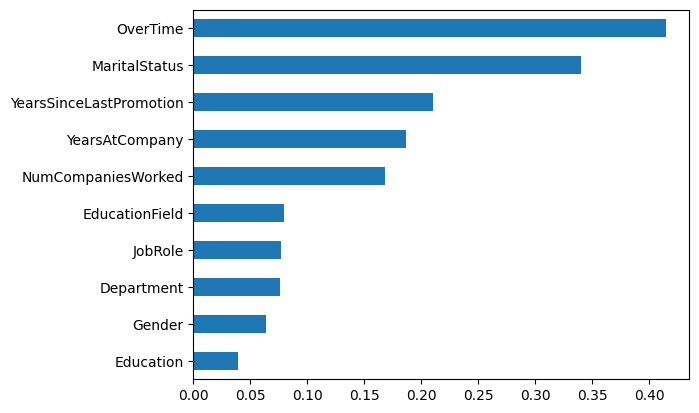

In [ ]:
# STEP 1: Get Feature Importance from Logistic Regression

# model.coef_ gives the weight of each feature
# Since this is binary classification, we take the first row [0]

coefficients = model.coef_[0]

# Create a Pandas Series so we can match each coefficient
# with its feature (column) name

importance = pd.Series(coefficients, index=X.columns)

# STEP 2: Sort the Importance Values
# Sort from lowest to highest
importance = importance.sort_values()

# STEP 3: Plot Top 10 Important Features
# Select top 10 features that influence attrition the most
top_features = importance.tail(10)

# Plot horizontal bar chart
top_features.plot(kind='barh')

plt.title("Top 10 Most Important Features")
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.show()
